In [1]:
import cv2 as cv
import math
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
f_path = '1.jpg' 
#file location

In [3]:
image = cv.imread(f_path,cv.IMREAD_GRAYSCALE)

In [4]:
cv.imwrite('image1.jpg', image)

True

In [5]:
image[0,0]

96

In [6]:
image_height,image_width = image.shape[:2]

In [7]:
print(image_width,image_height)

1024 673


In [8]:
gray_value = cv.calcHist([image], [0], None, [256], [0, 256])
#number calculate

In [9]:
print(gray_value[255])

[3055.]


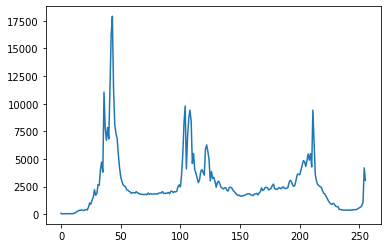

In [10]:
plt.plot(gray_value)
plt.show()

In [11]:
p = {}
caculate=0
for i in range(256) :
    p[i] = int(gray_value[i])/(image_width*image_height)

In [12]:
print(p[255])

0.004432984305349183


In [13]:
sigmap = 0.0
sum_num = 0
for i in range(256):
    if (p[i] > 0):
        logp = p[i] * math.log2(p[i])
        sigmap += logp
        sum_num += 1
sigmap*= -1
entropy = sigmap/sum_num
print(entropy)
#entropy

0.029377894776959367


In [14]:
xMin = image.min() 
xMax = image.max()  
x1, y1 = xMin, 0  
x2, y2 = xMax, 255  

In [15]:
x1, y1 ,x2, y2

(0, 0, 255, 255)

In [16]:
image2 = image.copy()
image_height2,image_width2= image2.shape[:2]

for i in range(0,image_height2):
    for j in range(0, image_width2):
        if image2[i,j] <= x1:
            image2[i,j] = image2[i,j]*(y1/x1)
                
        elif image2[i,j] <= x2:
            image2[i,j] = (image2[i,j]-x1)*((y2-y1)/(x2-x1))+x1
                
        else:
            image2[i,j] = (image2[i,j]-x2)*((255.-y2)/(255.-x2))+x2

C:\Users\User\AppData\Local\Temp\ipykernel_31680\2267092086.py:7: RuntimeWarning: invalid value encountered in true_divide
  image2[i,j] = image2[i,j]*(y1/x1)


In [17]:
cv.imwrite('image2.jpg', image2)

True